# 按文体计数

In [ ]:
from nltk.corpus import brown

In [ ]:
import nltk

In [ ]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)
)
cfd.conditions()

In [ ]:
genre_word = [
    (genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)
]


In [ ]:
len(genre_word)

In [ ]:
cfd['news']

In [ ]:
cfd['romance']

In [ ]:
print(len(cfd))
print(type(cfd))

In [ ]:
cfd['romance']['could']

# 绘制分布图和分布表


In [ ]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
        for target in ['america', 'citizen'] if w.lower().startswith(target)
)

In [ ]:
print(len(cfd))
cfd['america']

In [ ]:
from nltk.corpus import udhr
languages =['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1')
)

In [ ]:
cfd.tabulate(conditions=['English', 'German_Deutsch'],samples=range(10),cumulative=True)


# 使用双联词生成随机文本

In [ ]:
import nltk
sent = ["In", "the", "beginning", "God", "created", 'the', 'heaven', 'and', 'the', 'earth', '.']
list(nltk.bigrams(["In", "the", "beginning", "God"]))
list(nltk.bigrams(sent))


In [ ]:
# 这个例子，是试图用bigram自动生成文本。max()是它的算法。

def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word),
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
print(list(cfd['living']))
generate_model(cfd, 'living')

# 2.4 词典资源
## 词汇列表语料库

In [ ]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_volab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_volab)
    return unusual

unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

In [ ]:
unusual_words(nltk.corpus.nps_chat.words())

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

content_fraction(nltk.corpus.reuters.words())

## 名字语料库

In [41]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [46]:
male_names = names.words('male.txt')
print(list(male_names))

female_names = names.words('female.txt')
print(list(female_names))

['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel', 'Abdul', 'Abdulkarim', 'Abdullah', 'Abe', 'Abel', 'Abelard', 'Abner', 'Abraham', 'Abram', 'Ace', 'Adair', 'Adam', 'Adams', 'Addie', 'Adger', 'Aditya', 'Adlai', 'Adnan', 'Adolf', 'Adolfo', 'Adolph', 'Adolphe', 'Adolpho', 'Adolphus', 'Adrian', 'Adrick', 'Adrien', 'Agamemnon', 'Aguinaldo', 'Aguste', 'Agustin', 'Aharon', 'Ahmad', 'Ahmed', 'Ahmet', 'Ajai', 'Ajay', 'Al', 'Alaa', 'Alain', 'Alan', 'Alasdair', 'Alastair', 'Albatros', 'Albert', 'Alberto', 'Albrecht', 'Alden', 'Aldis', 'Aldo', 'Aldric', 'Aldrich', 'Aldus', 'Aldwin', 'Alec', 'Aleck', 'Alejandro', 'Aleks', 'Aleksandrs', 'Alessandro', 'Alex', 'Alexander', 'Alexei', 'Alexis', 'Alf', 'Alfie', 'Alfonse', 'Alfonso', 'Alfonzo', 'Alford', 'Alfred', 'Alfredo', 'Algernon', 'Ali', 'Alic', 'Alister', 'Alix', 'Allah', 'Allan', 'Allen', 'Alley', 'Allie', 'Allin', 'Allyn', 'Alonso', 'Alonzo', 'Aloysius', 'Alphonse', 'Alphonso', 'Alston', 'Alton', 'Alvin', 'Alwin', 'Amadeus'

<Axes: xlabel='Samples', ylabel='Counts'>

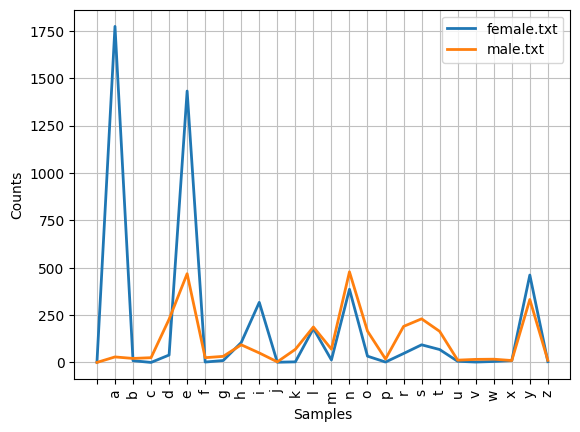

In [48]:
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid)
)
cfd.plot()

## 发音的词典

In [50]:
entries = nltk.corpus.cmudict.entries()
len(entries)

133737

In [51]:
for entry in entries[39943:39951]:
    print(entry)

('explorer', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'ER0'])
('explorers', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'ER0', 'Z'])
('explores', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'Z'])
('exploring', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'IH0', 'NG'])
('explosion', ['IH0', 'K', 'S', 'P', 'L', 'OW1', 'ZH', 'AH0', 'N'])
('explosions', ['IH0', 'K', 'S', 'P', 'L', 'OW1', 'ZH', 'AH0', 'N', 'Z'])
('explosive', ['IH0', 'K', 'S', 'P', 'L', 'OW1', 'S', 'IH0', 'V'])
('explosively', ['EH2', 'K', 'S', 'P', 'L', 'OW1', 'S', 'IH0', 'V', 'L', 'IY0'])


In [53]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron
        if ph1 == 'P' and ph3 == 'T':
            print(word,ph2,),

pait EY1
pat AE1
pate EY1
patt AE1
peart ER1
peat IY1
peet IY1
peete IY1
pert ER1
pet EH1
pete IY1
pett EH1
piet IY1
piette IY1
pit IH1
pitt IH1
pot AA1
pote OW1
pott AA1
pout AW1
puett UW1
purt ER1
put UH1
putt AH1


In [56]:
syllable = ["N", 'IH0', 'K', 'S']
a = [word for word, pron in entries if pron[-4:] == syllable]
print(a)

["atlantic's", 'audiotronics', 'avionics', 'beatniks', 'calisthenics', 'centronics', 'chamonix', 'chetniks', "clinic's", 'clinics', 'conics', 'conics', 'cryogenics', 'cynics', 'diasonics', "dominic's", 'ebonics', 'electronics', "electronics'", "endotronics'", 'endotronics', 'enix', 'environics', 'ethnics', 'eugenics', 'fibronics', 'flextronics', 'harmonics', 'hispanics', 'histrionics', 'identics', 'ionics', 'kibbutzniks', 'lasersonics', 'lumonics', 'mannix', 'mechanics', "mechanics'", 'microelectronics', 'minix', 'minnix', 'mnemonics', 'mnemonics', 'molonicks', 'mullenix', 'mullenix', 'mullinix', 'mulnix', "munich's", 'nucleonics', 'onyx', 'organics', "panic's", 'panics', 'penix', 'pennix', 'personics', 'phenix', "philharmonic's", 'phoenix', 'phonics', 'photronics', 'pinnix', 'plantronics', 'pyrotechnics', 'refuseniks', "resnick's", 'respironics', 'sconnix', 'siliconix', 'skolniks', 'sonics', 'sputniks', 'technics', 'tectonics', 'tektronix', 'telectronics', 'telephonics', 'tonics', 'un

In [59]:
list1 = [w for w, pron in entries if pron[-1] == 'M' and w[-1] == 'n']
print(list1)

sorted(set(w[:2] for w, pron in entries if pron[0] == 'N' and w[0] != 'n'))

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']


['gn', 'kn', 'mn', 'pn']

In [60]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']]

['abbreviated',
 'abbreviated',
 'abbreviating',
 'accelerated',
 'accelerating',
 'accelerator',
 'accelerators',
 'accentuated',
 'accentuating',
 'accommodated',
 'accommodating',
 'accommodative',
 'accumulated',
 'accumulating',
 'accumulative',
 'accumulator',
 'accumulators',
 'accusatory',
 'adenovirus',
 'adjudicated',
 'adjudicating',
 'administrating',
 'administrative',
 'administrator',
 "administrators'",
 "administrator's",
 'administrators',
 'adulterated',
 'adventurism',
 'adventurism',
 'affiliated',
 'affiliated',
 "affiliated's",
 'affiliating',
 'alleviated',
 'alleviated',
 'alleviating',
 'alliteration',
 'alliterative',
 'amalgamated',
 "amalgamated's",
 'amalgamating',
 'ameliorated',
 'ameridata',
 'amoxicillin',
 'anachronism',
 'anachronisms',
 'annihilated',
 'annihilating',
 'antagonism',
 'antagonisms',
 'antagonizing',
 'anticipated',
 'anticipated',
 'anticipating',
 'apologizes',
 'apologizing',
 'apothecary',
 'appreciated',
 'appreciating',
 'apprec

In [61]:
[w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']]

['abbreviation',
 'abbreviations',
 'abomination',
 'abortifacient',
 'abortifacients',
 'academicians',
 'accommodation',
 'accommodations',
 'accreditation',
 'accreditations',
 'accumulation',
 'accumulations',
 'acetylcholine',
 'acetylcholine',
 'adjudication',
 'administration',
 "administration's",
 'administrations',
 "administrations'",
 'aduliadae',
 'adulteration',
 'affiliation',
 'affiliations',
 'aficionados',
 'agglomeration',
 'ahasuerus',
 'ajinomoto',
 'alleviation',
 'amalgamation',
 'ambrosiano',
 'amelioration',
 'americana',
 "americana's",
 'americanas',
 'americano',
 'americanos',
 'anachronistic',
 'anencephalic',
 'annihilation',
 'antagonistic',
 'anticipation',
 'anticipations',
 'apocalyptic',
 'apologetic',
 'apotheosis',
 'appreciation',
 'appropriation',
 'appropriations',
 'approximation',
 'approximations',
 'aristocratic',
 'arunachalam',
 'assassination',
 'assassinations',
 'assimilation',
 'association',
 'association',
 'associations',
 "associat

In [65]:
p3 = [(pron[0]+'-'+pron[2], word) for (word,pron) in entries if pron[0] == 'P' and len(pron) == 3]

cfd = nltk.ConditionalFreqDist(p3)
for template in cfd.conditions(): # 这里的template指的是，把第一个音节和第三个音节拼起来的字符串。
    if len(cfd[template]) > 10:
        words = cfd[template].keys()
        wordlist = ' '.join(words)
        print(template,wordlist[:70]+"...")

P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-Z pais paiz pao's pas pause paws pays paz peas pease pei's perz pez pies...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...


In [66]:
prondict = nltk.corpus.cmudict.dict()
prondict['fire']

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

In [67]:
text = ['natural', 'language', 'processing']
[ph for w in text for ph in prondict[w][0]]

['N',
 'AE1',
 'CH',
 'ER0',
 'AH0',
 'L',
 'L',
 'AE1',
 'NG',
 'G',
 'W',
 'AH0',
 'JH',
 'P',
 'R',
 'AA1',
 'S',
 'EH0',
 'S',
 'IH0',
 'NG']

## 比较词表

In [69]:
from nltk.corpus import swadesh
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [70]:
fr2en = swadesh.entries(['fr', 'en'])
fr2en

[('je', 'I'),
 ('tu, vous', 'you (singular), thou'),
 ('il', 'he'),
 ('nous', 'we'),
 ('vous', 'you (plural)'),
 ('ils, elles', 'they'),
 ('ceci', 'this'),
 ('cela', 'that'),
 ('ici', 'here'),
 ('là', 'there'),
 ('qui', 'who'),
 ('quoi', 'what'),
 ('où', 'where'),
 ('quand', 'when'),
 ('comment', 'how'),
 ('ne...pas', 'not'),
 ('tout', 'all'),
 ('plusieurs', 'many'),
 ('quelques', 'some'),
 ('peu', 'few'),
 ('autre', 'other'),
 ('un', 'one'),
 ('deux', 'two'),
 ('trois', 'three'),
 ('quatre', 'four'),
 ('cinq', 'five'),
 ('grand', 'big'),
 ('long', 'long'),
 ('large', 'wide'),
 ('épais', 'thick'),
 ('lourd', 'heavy'),
 ('petit', 'small'),
 ('court', 'short'),
 ('étroit', 'narrow'),
 ('mince', 'thin'),
 ('femme', 'woman'),
 ('homme', 'man (adult male)'),
 ('homme', 'man (human being)'),
 ('enfant', 'child'),
 ('femme, épouse', 'wife'),
 ('mari, époux', 'husband'),
 ('mère', 'mother'),
 ('père', 'father'),
 ('animal', 'animal'),
 ('poisson', 'fish'),
 ('oiseau', 'bird'),
 ('chien', 'dog'

In [71]:
translate = dict(fr2en)
translate['chien']

'dog'

In [72]:
translate['jeter']

'throw'

In [75]:
de2en = swadesh.entries(['de', 'en'])
es2en = swadesh.entries(['es', 'en'])
translate.update(dict(de2en))
translate.update(dict(es2en))
print(translate['Hund'])
translate['perro']


dog


'dog'

# 2.5 WordNet
> WordNet 是面向语义的英语词典，与传统词典类似，但结构更丰富。NLTK中包括英语WordNet，共有155287个单词和117659个同意词。我们将从寻找同义词和如何在WordNet中访问它们开始。

## 意义与同义词

In [77]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [88]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [80]:
wn.synsets('lemma')

[Synset('lemma.n.01'), Synset('lemma.n.02'), Synset('lemma.n.03')]

In [87]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [89]:
wn.synset('lemma.n.01').lemma_names()

['lemma']

In [94]:
print(wn.synset('lemma.n.01').definition())
print(wn.synset('lemma.n.02').definition())
print(wn.synset('lemma.n.03').definition())

a subsidiary proposition that is assumed to be true in order to prove another proposition
the lower and stouter of the two glumes immediately enclosing the floret in most Gramineae
the heading that indicates the subject of an annotation or a literary composition or a dictionary entry


In [97]:
print(wn.synset('lemma.n.01').examples())
print(wn.synset('lemma.n.02').examples())
print(wn.synset('lemma.n.03').examples())
print(wn.synset('car.n.01').examples())


[]
[]
[]
['he needs a car to get to work']


In [99]:
print(wn.synset('car.n.01').lemmas())
print(wn.synset('car.n.01').lemma_names())



[Lemma('car.n.01.car'), Lemma('car.n.01.auto'), Lemma('car.n.01.automobile'), Lemma('car.n.01.machine'), Lemma('car.n.01.motorcar')]
['car', 'auto', 'automobile', 'machine', 'motorcar']


In [100]:
wn.synsets('cars')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [104]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [105]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

## WordNet的层次结构

In [134]:
wn.synsets('hyponyms')
print(wn.synset('hyponym.n.01').lemma_names())
print(wn.synset('hyponym.n.01').lemmas())
print(wn.synset('hyponym.n.01').definition())
print(wn.synset('hyponym.n.01').examples())

prondict = nltk.corpus.cmudict.dict()
prondict['apple']


['hyponym', 'subordinate', 'subordinate_word']
[Lemma('hyponym.n.01.hyponym'), Lemma('hyponym.n.01.subordinate'), Lemma('hyponym.n.01.subordinate_word')]
a word that is more specific than a given word
[]


[['AE1', 'P', 'AH0', 'L']]

In [146]:
motocar = wn.synset('car.n.01')
types_of_motocar = motocar.hyponyms()
types_of_motocar[2:18]

[Synset('ambulance.n.01'),
 Synset('roadster.n.01'),
 Synset('convertible.n.01'),
 Synset('touring_car.n.01'),
 Synset('gas_guzzler.n.01'),
 Synset('subcompact.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('coupe.n.01'),
 Synset('pace_car.n.01'),
 Synset('stanley_steamer.n.01'),
 Synset('jeep.n.01'),
 Synset('electric.n.01'),
 Synset('loaner.n.02'),
 Synset('minicar.n.01'),
 Synset('hot_rod.n.01'),
 Synset('compact.n.03')]

In [147]:
# 一个个下位词打印过去
print(wn.synset('ambulance.n.01').lemma_names())
print(wn.synset('roadster.n.01').lemma_names())
print(wn.synset('convertible.n.01').lemma_names())
print(wn.synset('touring_car.n.01').lemma_names())
print(wn.synset('gas_guzzler.n.01').lemma_names())
print(wn.synset('subcompact.n.01').lemma_names())
print(wn.synset('jeep.n.01').lemma_names())
# 打印全部下位词的同义词。
sorted([lemma.name() for synset in types_of_motocar for lemma in synset.lemmas()])

['ambulance']
['roadster', 'runabout', 'two-seater']
['convertible']
['touring_car', 'phaeton', 'tourer']
['gas_guzzler']
['subcompact', 'subcompact_car']
['jeep', 'landrover']


['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']